<a href="https://colab.research.google.com/github/joaquinvvelaco/diplo-datos-2022/blob/main/ayvd/entregables/Grupo_29_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_contract_type', 'salary_in_usd'] 

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
0,ninguno,Ninguno,43000.0,Full-Time,NaN,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Full-Time,NaN,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,NaN,"[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,Full-Time,NaN,"[assembler, bash/shell, c, c#, python, r]"
10,python,"HTML, Javascript, Python",36800.0,Freelance,NaN,"[html, javascript, python]"
11,python,"Bash/Shell, Python",94621.0,Full-Time,NaN,"[bash/shell, python]"


# Actividades Grupo 29 (Ejercicio 1)

Pregunta inicial: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

## 1) Seleccionar las columnas relevantes para analizar.

Las columnas que consideramos relevantes para nuestro análisis son las siguientes*:

*  **'tools_programming_languages'**: forma parte de la pregunta que queremos responder.
*  **'salary_monthly_NETO'**: es una de las medidas de salarios del dataset. Como está altamente correlacionada al Salario Bruto (ver Ejercicio 2-b), podemos extraer conclusiones similares utilizando solamente una de estas variables numéricas.
*  **'work_contract_type'**: nos permite filtrar por una subpoblación donde podamos comparar observaciones del mismo tipo, e.g. personas que trabajen la misma cantidad de horas: Full-time (8 horas). De esta forma reducimos el ruido/dispersión de casos donde es incierto la cantidad de horas trabajadas (Part-times, freelance) y por lo tanto los salarios no son necesariamente comparables.
*  **'salary_in_usd'**: nos permite identificar observaciones que no se correspondan con la unidad monetaria de nuestro interés (ARS), y de ese modo descartarlas.

_\* En el Apéndice se muestra un análisis más pormenorizado de la justificación de nuestra selección._

## 2) Seleccionar las filas relevantes para analizar. (Preprocesamiento de datos)

>Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
>*  Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
>* Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.


A modo de poder trabajar con un dataset más limpio y con el que podamos sacar mejores conclusiones, nos propusimos a realizar un preprocesamiento, segmentado en tres etapas:

1.   Preprocesamiento preliminar
2.   Limpieza de lenguajes
3.   Selección de lenguajes de interés





### Funciones de filtrado

#### Funciones genéricas
_Estas funciones van a aplicar las máscaras o filtros definidos en las siguientes subsecciones, y van a ser reutilizadas en el Ejercicio 2_

In [ ]:
# Funciones genéricas
def preprocess_dataset(dataset, masks):
  return filter(dataset, masks)

def filter(dataset, masks):
  filters = get_filter(dataset, masks)
  return dataset[filters]

def get_filter(dataset, masks):
  filters = np.full((len(dataset),), True)
  for mask in masks:
    filters &= mask
  return filters

#### Funciones para el filtrado inicial
_Funciones para generar máscaras o filtros que son independientes de los lenguajes de programación. Las mismas serán reutilizadas en el Ejercicio 2_

In [ ]:
# Funciones para generar máscaras de filtrado
def mask_for_clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return mask_outlier

def mask_for_clean_outliers_multiple(dataset, column_names):
  """Returns dataset removing the outlier rows from one or multiple columns"""
  if type(column_names) is str:
    return mask_for_clean_outliers(dataset, column_names)
  else:
    masks = [
            mask_for_clean_outliers(dataset, column_name)
            for column_name in column_names
            ]
    return get_filter(dataset, masks)
    
def calc_iqr(dataset, column_name):
  """Returns interquartile range of a dataset"""
  q1 = dataset[column_name].quantile(0.25)
  q3 = dataset[column_name].quantile(0.75)
  return q1, q3, q3 - q1

def mask_for_clean_outliers(dataset, column_name):
  """Returns dataset removing the outlier rows from column @column_name.
  References: 
  [1] https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097
  [2] http://www.cs.uni.edu/~campbell/stat/normfact.html
  """
  iqr = calc_iqr(dataset, column_name)
  lower_bound = iqr[0] - 1.5 * iqr[2]  # Q1 - 1.5 * IQR 
  upper_bound = iqr[1] + 1.5 * iqr[2]  # Q3 + 1.5 * IQR

  interest_col = dataset[column_name]
  
  mask_outlier = ((interest_col >= lower_bound) & (interest_col <= upper_bound))
  
  return mask_outlier

def mask_for_remove_work_contract_type_different_to(dataset, work_contract_type):
  return (dataset.work_contract_type == work_contract_type)

def mask_for_remove_noninteresting_languages(dataset, interesting_languages):
  return dataset.programming_language.isin(interesting_languages)

def mask_for_remove_usd_salary(dataset, max_usd_salary):
  return ~((dataset.salary_monthly_NETO < max_usd_salary) & (~(dataset.salary_in_usd.isna())))

def mask_for_remove_thousand_sep_error(dataset):
  return (dataset.salary_monthly_NETO > 1000)

#### Funciones para el filtrado de lenguajes
_Funciones de filtrado específicas a los lenguajes relevantes para nuestro análisis_

In [ ]:
# Funciones de filtrado específicas a lenguajes relevantes a nuestro análisis

def mask_for_remove_wrong_languages(dataset):
  """
  Genera una máscara/filtro que descarta observaciones basado en los caracteres 
  que no deberían estar contenidos en 'programming_language'

  """
  non_alpha = """["$%&\'(),:;<=>?[\\]^_`{|}~ ]"""  # non-alphanumeric characters
  punctuation = r"[.+,-@*/\\#]"  # punctuation chars found in language names
  masks = [
    # records not containing non-alphanumeric characters
    ~(dataset['programming_language'].str.contains(non_alpha, case=False)),
    # records that are not single-character and contain punctuation marks
    ~((dataset['programming_language'].str.contains(punctuation)) & 
      (dataset['programming_language'].str.len() == 1)),
    # records that are not zero-length 
    ~(dataset['programming_language'].str.len() == 0),
  ]
  return get_filter(dataset, masks)

def mask_for_min_language_number(dataset, threshold=4):
  language_count = dataset[['programming_language','salary_monthly_NETO']
                           ].groupby(['programming_language']).agg(['count'])
  index = ( 'salary_monthly_NETO', 'count')
  
  mask_lang_above_threshold = language_count[index] > threshold
  
  language_filtered = language_count[mask_lang_above_threshold].index

  return (dataset['programming_language'].isin(language_filtered))

def mask_for_remove_nonlanguages(dataset):
    """
    Función que genera máscara para excluir los lenguajes de programación: 
    'ninguno' y 'no'
    """
    non_languages = ['ninguno', 'no']
    return ~(dataset.programming_language.isin(non_languages))


def mask_for_remove_values_below_median(dataset, col_name_cat, col_name_num):
  """
  Agrupa por lenguaje y filtra aquellos donde la mediana del salario NETO se 
  encuentre por debajo de la mediana total del dataset.
  """
  groups = dataset.groupby([col_name_cat]).agg(['median'])
  
  dataset_median = dataset[col_name_num].median()

  mask_median = groups[(col_name_num, 'median')] > dataset_median

  groups_above_median = groups[mask_median].index
  
  return dataset[col_name_cat].isin(groups_above_median)


def mask_for_remove_values_freq_below_median(dataset, column_name):
  """
  Filtra lenguajes cuya frecuencia de obs es mayor al promedio.
  """
  column_freq = get_column_frequency(dataset, column_name)

  median_frequency = column_freq['frequency'].median()

  infrequent_values_df = column_freq[column_freq['frequency'] < median_frequency]
  
  infrequent_values = infrequent_values_df[column_name].values

  return ~(dataset[column_name].isin(infrequent_values))


def get_column_frequency(dataset, column_name):
  """
  Obtiene la frecuencia de observaciones para una dada columna @column_name.
  """
  column_count = dataset[column_name].value_counts()\
    .reset_index()\
    .rename(columns={'index': column_name, column_name: 'frequency'})
  return column_count


def remove_noninteresting_languages(dataset):
    # El criterio para obtener los lenguajes de interés es modificable. 
    # Definir una función que reciba los parámetros necesarios y devuelva la lista
    # de lenguajes de interés.
    interesting_languages = get_interesting_languages_by_formula(dataset, 0.75)
    print(interesting_languages)
    return dataset[mask_for_remove_noninteresting_languages(dataset, interesting_languages)]

def get_interesting_languages_by_formula(dataset, popularity_weight):
  """ El objetivo de get_interesting_languages_by_formula es obtener un 
    listado de lenguajes relevantes para acotar el análisis del lenguaje asociado al mejor salario.
    Para esto, se tiene en cuenta la popularidad del lenguaje y su salario medio.
    En base a estas variables del dataset, se normalizan y ponderan los valores,
    comparandolos contra un valor general medio normalizado.
  """
  #Inicializo el parámetro faltante
  salary_weight = 1-popularity_weight

  df_groups = dataset.groupby('programming_language')

  df_grouped = df_groups.agg(
      programming_language = ('programming_language','first'), # Agrupo por lenguaje de programación
      mean_salary=('salary_monthly_NETO','mean'), # Calculo el salario neto medio
      programming_language_frecuency=('programming_language','count')) # Calculo la frecuencia del lenguaje

  # Agrego la columna de frecuencia relativa o proporción del lenguaje respecto al total
  df_grouped['programming_language_relative_frecuency'] = df_grouped.programming_language_frecuency / df_grouped.programming_language_frecuency.sum()

  # Agrego la columna de salario medio normalizado
  df_grouped['normalize_mean_salary'] = df_grouped.mean_salary / df_grouped.mean_salary.sum()

  # Calculo la métrica que servirá como filtro
  df_grouped['metric_value'] =  popularity_weight * df_grouped.programming_language_relative_frecuency + salary_weight * df_grouped.normalize_mean_salary 

  # Calculo frecuencia relativa media 
  mean_programming_language_relative_frecuency = df_grouped.programming_language_relative_frecuency.mean()

  # Calculo la media de los salarios medios normalizados
  mean_normalize_mean_salary = df_grouped.normalize_mean_salary.mean()

  # Calculo el valor de corte
  cutoff_value = popularity_weight * mean_programming_language_relative_frecuency + salary_weight * mean_normalize_mean_salary

  # Filtro los lenguajes por valor de corte
  df_grouped_filtered = df_grouped[((df_grouped['metric_value'] >= cutoff_value) & (df_grouped['programming_language'] != "ninguno"))]

  interesting_languages = df_grouped_filtered.programming_language.values
  len(interesting_languages)
  
  return interesting_languages



### Aplicación de los filtros sobre la data

#### 1. Preprocesamiento preliminar

En esta primera etapa utilizamos los siguientes filtros preliminares*:
*   Remover registros cuyos work contract types _**no**_ sean 'Full-time', a modo de usar registros que sean comparables (en este paso excluimos part-time y freelance).
*   Remover registros donde el 'salary_monthly_NETO' sea menor a 1000 (mil), dado que estos probablemente surgen de incluir un punto como separador de miles.
*   Remover salarios en USD, aplicando un filtro simultáneo sobre la combinación del campo 'salary_in_usd' (booleano) con una restricción en el monto del 'salary_monthly_NETO' que sea menor a 10000 (diez mil), un valor que nos parece _"razonable"_ para usar de cota.
*  Remover outliers, usando el criterio de 1.5 * IQR. <sup>([1](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097), [2](http://www.cs.uni.edu/~campbell/stat/normfact.html))</sup>

_\* Ver análisis pormenorizado en las siguientes subsecciones._


>En síntesis, filtramos los datos aplicando las siguientes máscaras:
  *  Work-contract = **Full-time**
  *  Salario neto > **1000**
  *  Salario neto no está en USD
  *  Salario neto no es outlier

In [ ]:
# Hacemos el primer filtrado de los datos
def filtrado_de_datos(dataset, outlier_cols):
  """Filtra dataset aplicando las siguientes máscaras:
      * Work-contract = Full-time
      * Salario neto > 1000
      * Salario neto no está en USD
      * Salario neto no es outlier (ver nota)
  Nota: La columna sobre la cual se aplica la remoción de outliers puede ser
  cualquier columna o lista de columnas ingresadas en @outlier_cols, no sólo 
  'Salario neto'
  """
  mask_preprocess = [
    mask_for_remove_work_contract_type_different_to(dataset, "Full-Time"),
    mask_for_remove_thousand_sep_error(dataset),
    mask_for_remove_usd_salary(dataset, 10000),    
    mask_for_clean_outliers_multiple(dataset, outlier_cols),
    ]

  clean_df = preprocess_dataset(dataset, mask_preprocess)
  
  print(f"Cantidad de observaciones filtradas: {len(clean_df)}\n")

  return clean_df

clean_df_prefilter = filtrado_de_datos(df_lang, "salary_monthly_NETO")

clean_df_prefilter[['programming_language', 'salary_monthly_NETO']].head()


Cantidad de observaciones filtradas: 13529



,programming_language,salary_monthly_NETO
0,ninguno,43000.0
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
2,ninguno,127000.0


#### 2. Limpieza de lenguajes
En esta segunda etapa, removemos registros donde el 'programming_language' _**no**_ se ajuste a los siguientes criterios*:
  *  Tener un número de ocurrencias mayor o igual a 4, para al menos poder computar IQR,
  *  El nombre no puede ser sólo un signo de puntuación, e.g. **.** (punto) o **,** (coma)
  *  El nombre no puede contener caracteres no-alfabéticos, salvo los siguientes: _**.-+@\*/#\\**_, que sí forman parte del nombre de algunos lenguajes (.net, c#, etc.). Basado en la siguiente [lista de lenguajes de programación](https://en.wikipedia.org/wiki/List_of_programming_languages).
  *  Remover observaciones que _**no**_ se correspondan a un salario de desarrollador/programador, e.g. business analyst, manager, etc. Para ello utilizamos como filtro el valor 'ninguno' en 'programming_language'.
  *  Remover outliers, usando el criterio visto en clase de 2.5 * IQR.

_\* Ver análisis pormenorizado en las siguientes subsecciones._


>En síntesis, filtramos los datos aplicando las siguientes máscaras:
  *  Lenguaje no contiene caracteres raros
  *  Lenguaje tiene un número mínimo de observaciones
  *  Lenguaje no pertenece a 'ninguno' o 'no'

In [ ]:
# Filtramos por lenguajes de interés
def filtrado_de_datos_lenguajes(dataset, by_stats=False):
  """Filtra el dataset aplicando las siguientes máscaras:
      * Lenguaje no contiene caracteres raros
      * Lenguaje tiene un número mínimo de observaciones
      * Lenguaje no pertenece a 'ninguno' o 'no'
    
  Si el parámetro by_stats=True, además aplica las siguientes máscaras:
      * Frecuencia del Lenguaje es mayor a la mediana
      * La mediana del salario del lenguaje es mayor a la mediana del salario 
      (contemplando todos los lenguajes).
  """
  mask_languages = [
    mask_for_remove_wrong_languages(dataset),
    mask_for_min_language_number(dataset),
    mask_for_remove_nonlanguages(dataset),
    ]
  if by_stats:
    mask_languages = [
      mask_for_remove_values_freq_below_median(dataset, 'programming_language'),
      mask_for_remove_values_below_median(dataset, 'programming_language', 'salary_monthly_NETO')
    ]
  
  filtered_df = preprocess_dataset(dataset, mask_languages)

  print(f"Cantidad de observaciones filtradas: {len(filtered_df)}\n")
  print(f"Lenguajes después del filtrado: {filtered_df.programming_language.unique()}\n")
  return filtered_df

clean_df_lang = filtrado_de_datos_lenguajes(clean_df_prefilter)

clean_dataset_mean = clean_df_lang['salary_monthly_NETO'].mean()
clean_dataset_median = clean_df_lang['salary_monthly_NETO'].median()

clean_df_lang[['programming_language', 'salary_monthly_NETO']].head()
#clean_df = remove_noninteresting_languages(clean_df_prefilter)

Cantidad de observaciones filtradas: 13055

Lenguajes después del filtrado: ['html' 'javascript' 'python' 'bash/shell' 'c' 'css' 'java' 'php' 'sql'
 'typescript' 'assembler' 'c#' 'r' '.net' 'delphi' 'vba' 'scala' 'c++'
 'abap' 'go' 'perl' 'swift' 'kotlin' 'powershell' 'matlab' 'ruby' 'apex'
 'objective-c' 'genexus' 'groovy' 'pl/sql' 'dart' 'vb6' 'rust' 'cobol'
 'actionscript' 'powerbuilder' 'smalltalk' 'visual' 'clojure']



,programming_language,salary_monthly_NETO
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,bash/shell,102000.0
3,c,102000.0


#### 3. Selección de lenguajes de interés
Finalmente, y para simplificar el análisis visual, filtramos una vez más para quedarnos solamente con los lenguajes más frecuentes y con los salarios más altos:
  *  **Lenguajes más frecuentes:** lenguajes cuya frecuencia de observaciones sea mayor a la **mediana** de las frecuencias del dataset resultante del paso #2.
  *  **Lenguajes con salarios altos:** lenguajes cuya **mediana** del salario se encuentre por encima de la **mediana** del salario de todos los lenguajes del dataset resultante del paso #2.

In [ ]:
# Filtramos por lenguajes más frecuentes y con salarios más altos
clean_df = filtrado_de_datos_lenguajes(clean_df_lang, by_stats=True)

clean_df[['programming_language', 'salary_monthly_NETO']].head()

Cantidad de observaciones filtradas: 4299

Lenguajes después del filtrado: ['python' 'bash/shell' 'java' 'typescript' 'scala' 'go' 'swift' 'kotlin'
 'ruby' 'groovy']



,programming_language,salary_monthly_NETO
1,python,63000.0
3,bash/shell,102000.0
3,java,102000.0
3,python,102000.0
4,typescript,106000.0


### Reformulación de la pregunta inicial

En base a lo observado en los datos y al preprocesamiento realizado, en particular el 3er paso, decidimos reformular la pregunta de análisis:

**¿Cuáles son los lenguajes de programación _populares_ asociados a los mejores salarios?**

Esto es porque notamos que algunos de los lenguajes de programación con los salarios más altos se correspondían con lenguajes con pocas observaciones, y no creemos que sean representativos o interesantes dado que corresponden a nichos. Algunos ejemplos de esos lenguajes son: closure, objective-c, rust, etc.

Por ello decidimos quedarnos con los lenguajes más frecuentes, utilizando la mediana como métrica de referencia, i.e. tomando la mitad más frecuente de lenguajes del dataset.

En la misma línea, y a modo de acotar el número de lenguajes que vamos a mostrar en nuestro análisis, decidimos quedarnos con los lenguajes cuya mediana del salario sea mayor o igual a la mediana del salario de todos los lenguajes.

En la sección 3, hacemos una comparativa entre el filtrado crudo (post paso #2) y la selección final de lenguajes (post paso #3).

A modo de simplificar el lenguaje que usamos, nos referiremos a los lenguajes de programación _populares_ asociados a los mejores salarios como **_LPPAMS_**.

## 3) Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. 

Elegir UNA de las siguientes opciones:
  *  Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  *  Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde mayoría es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  *  Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

### Funciones de visualización
Definimos las funciones necesarias para llevar a cabo el análisis exploratorio.

#### Funciones auxiliares

In [ ]:
def get_order_index_by_median(dataset):
  return dataset.groupby("programming_language")["salary_monthly_NETO"].median().sort_values()[::-1].index

def add_quantiles_to_dataframe(dataset, number_of_quantiles):
  dataset["quantil"] = pd.qcut(dataset['salary_monthly_NETO'], 
                                number_of_quantiles, 
                                labels = False)

def get_frequency_distribution_of_programming_languages(dataset):
  return dataset.groupby("programming_language").agg(
      programming_language = ('programming_language', 'first'),
      frecuency=('programming_language','count')
  )

def get_relative_frequency_distribution_of_programming_languages(dataset, total_frequency_distribution):
  frecuency_distribution = get_frequency_distribution_of_programming_languages(dataset)
  total_frequency = []
  for language in frecuency_distribution.programming_language.values:
    total_frequency.append(get_frecuency_of_programming_language(language, total_frequency_distribution))
  frecuency_distribution["relative_frecuency"] = frecuency_distribution.frecuency / total_frequency
  
  return frecuency_distribution.sort_values("relative_frecuency")

def get_frecuency_of_programming_language(programing_language, frequency_distribution):
  return frequency_distribution[frequency_distribution["programming_language"] == programing_language].frecuency.values[0]

def plot_create_subplots(n_subplots, sup_title, n_rows = 5, share_x=True, fig_size=(16, 16)):
  seaborn.set(style="darkgrid")
  n_ratio = int(n_subplots/n_rows) 
  n_cols = n_ratio if n_subplots % n_rows == 0 else n_ratio + 1
  fig, axes = plt.subplots(n_rows, n_cols, sharex=share_x, figsize=fig_size)
  fig.suptitle(sup_title)
  return fig, axes

def get_palette(unique):
  return dict(zip(unique, seaborn.color_palette(n_colors=len(unique))))


#### Funciones para armar los histogramas

In [ ]:
label_salario = 'Salario neto (ARS)'

def plot_histogram_by_programming_language(dataset):
  languages = get_order_index_by_median(dataset).values
  frequencies = get_frequency_distribution_of_programming_languages(dataset)

  salary_max = dataset.salary_monthly_NETO.max()
  salary_min = dataset.salary_monthly_NETO.min()

  sup_title = 'Histogramas de Salario neto por Lenguaje de programación'

  n_lang = len(languages)
  n_rows = 5
  fig, axes = plot_create_subplots(n_lang, sup_title, n_rows)
  i = 0
  for i in range(n_lang):
    row = i % n_rows
    col = int(i/n_rows)    
    language = languages[i]
    plot_histogram(dataset[dataset.programming_language == language],
                   language, axes[row, col], salary_max, salary_min,
                   frequencies[frequencies.index == language].values[0][1])
    i += 1
    if i == n_lang:  
      handles, labels = axes[row, col].get_legend_handles_labels()
      fig.legend(handles, labels, loc='upper right')


def plot_histogram(dataset, language, axes, x_max, x_min, frequency):
  mean = dataset["salary_monthly_NETO"].mean()
  median = dataset["salary_monthly_NETO"].median()
  std = dataset["salary_monthly_NETO"].std()
  
  axes.set( 
      xlabel=label_salario,
      ylabel='Cantidad de observaciones', 
      title=language)
  
  axes.axvline(
      mean, 
      color='orangered', linestyle='--', 
      label='Media')
  
  axes.axvline(
      median, 
      color='indigo', 
      linestyle='-.', 
      label='Mediana')
 
  seaborn.histplot(
      dataset["salary_monthly_NETO"], 
      bins="auto", 
      ax=axes, 
      color='skyblue')
  
  axes.set_xlim(x_min, x_max)
  axes.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
  axes.label_outer()
  
  create_textbox(axes, mean, median, std, frequency)


def create_textbox(axes, mean, median, std, frequency):
  """Arma un bloque de texto con los siguientes estadísticos: media, mediana, 
  desviación, # de observaciones
  """
  text = '\n'.join((
    f'$\mu=\${mean:,.0f}$',
    f'$median=\${median:,.0f}$',
    f'$\sigma=\${std:,.0f}$',
    f'$count={frequency:,.0f}$'))
  
  # these are matplotlib.patch.Patch properties
  properties = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  # place a text box in upper left in axes coords
  axes.text(0.05, 0.95, text, transform=axes.transAxes, fontsize=9,
        verticalalignment='top', bbox=properties)
  

#### Funciones para armar el boxplot

In [ ]:
def plot_bloxpot(dataset, ref_mean, ref_median, fig_size_x=12, fig_size_y=6, 
                 plot_title='Distribución del Salario Neto según lenguaje de programación'):
  matplotlib.rc_file_defaults()
  plt.figure(figsize=(fig_size_x, fig_size_y))
  seaborn.boxenplot(
      data=dataset, x="salary_monthly_NETO", 
      y='programming_language', 
      palette="Set2",
      #color='orangered',
      order = get_order_index_by_median(dataset)
    ).set(
      xlabel=label_salario, 
      ylabel='Lenguaje de programación',
      title=plot_title
      ) 
  
  plt.axvline(x=ref_mean, 
              color='orangered', 
              linestyle='--',
              label='Media (todos los lenguajes)')
  plt.axvline(x=ref_median,
              color='indigo',
              linestyle='-.',
              label='Mediana (todos los lenguajes)')

  plt.ticklabel_format(style='plain', axis='x')
  
  current_values = plt.gca().get_xticks()
  plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])
  
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


#### Funciones para armar los barplots
Utilizadas para analizar frecuencias relativas

In [ ]:
def plot_programming_language_distribution_by_quantil(dataset):
  matplotlib.rc_file_defaults()
  languages = dataset.programming_language.unique()
  quantiles = dataset.quantil.unique()
  quantiles.sort()
  n_quantiles = len(quantiles)

  total_frequency_distribution = get_frequency_distribution_of_programming_languages(dataset)
  
  sup_title = "Frecuencia relativa de lenguajes de programación respecto al total de cada lenguaje en el cuantil n"
  fig, axes = plot_create_subplots(n_quantiles, sup_title, n_rows = n_quantiles, share_x=False, fig_size=(18, 14))

  i = 0
  for i in range(n_quantiles):
    row = i
    quantil = quantiles[i]
    plot_programming_language_distribution(dataset[dataset.quantil==quantil], quantil, total_frequency_distribution, languages, axes[i])

    if i + 1 == n_quantiles:
        axes[i].set(
          xlabel='Lenguage de programación')
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])

def plot_programming_language_distribution(dataset, quantil, total_frequency_distribution, languages, axes):
  
  relative_frequency_distribution = get_relative_frequency_distribution_of_programming_languages(dataset, total_frequency_distribution)

  plot_title = f"Cuantil {quantil+1}"

  seaborn.barplot(
      ax=axes,
      x = "programming_language", 
      y = "relative_frecuency", 
      data = relative_frequency_distribution,
      palette=get_palette(languages)
      )
  
  axes.set(
          xlabel='',
          ylabel='Frecuencia relativa',
          title=plot_title)
  
  axes.set_ylim(0, 0.5)

#### Funciones para armar los ridgeplots
Utilizadas para analizar las distribuciones

In [ ]:
def plot_ridgeplot(dataset):
  """Arma un ridgeplot con distribuciones de salario según lenguages de programación
  """

  seaborn.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

  # Select top 5 languages
  languages = get_order_index_by_median(dataset).values[:5]

  # Keep dataset for top 5
  df_top5 = dataset[dataset.programming_language.isin(languages)]
  
  # Save the rest of the data in another df
  df_other = dataset[~dataset.programming_language.isin(languages)]
  # Add 'otros' as a new category
  df_other['programming_language'] = 'otros'
  
  df_top5 = pd.concat([df_top5, df_other]).reset_index()

  languages = np.append(languages, 'otros')

  # Convert column 'programming_language' to pd.Categorical so that we can sort by the order established in the languages list
  df_top5['programming_language'] = pd.Categorical(
      df_top5['programming_language'],
      categories = languages,
      ordered=True
  )

  # Initialize the FacetGrid object
  palette = seaborn.color_palette("colorblind")
  g = seaborn.FacetGrid(df_top5,
                    row="programming_language",
                    hue="programming_language",
                    aspect=5, height=2.5, palette=palette)

  # Draw the densities in a few steps
  g.map(seaborn.kdeplot, "salary_monthly_NETO",
        bw_adjust=.5, clip_on=False,
        fill=True, alpha=1, linewidth=2.5)

  g.map(seaborn.kdeplot, "salary_monthly_NETO", clip_on=False, color="w", lw=2.5, bw_adjust=.5)

  # passing color=None to refline() uses the hue mapping
  g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

  # Define and use a simple function to label the plot in axes coordinates
  def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
              ha="left", va="center", transform=ax.transAxes, fontsize=16)
      
  # Set the subplots to overlap
  g.figure.subplots_adjust(hspace=-.5)

  # Remove axes details that don't play well with overlap
  g.set_titles("")
  g.set(yticks=[], ylabel="")
  g.despine(bottom=True, left=True)


  def custom(y, **kwargs):
      ym = y.median()
      plt.axvline(ym, color="#334488", linestyle="dashed")

      text = '\n'.join((
      f'$\${ym:,.0f}$',
      ))
      
      # these are matplotlib.patch.Patch properties
      properties = dict(boxstyle='round', facecolor='lavender', alpha=0.5)
      

      # place a text box in upper left in axes coords
      plt.text(ym, 1, text, transform=plt.gca().get_xaxis_transform(), fontsize=14,
            verticalalignment='top', bbox=properties)


  g.map(custom, "salary_monthly_NETO")

  g.map(label, "salary_monthly_NETO")

  g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp
  g.fig.suptitle('Distribución del salario (neto) según lenguajes de programación', fontsize=18)

  plt.annotate('Fuente: sysarmy - Encuesta de remuneración salarial Argentina 2020', (0,0), (250, -50), xycoords='axes fraction', textcoords='offset points', va='top')

  axes = g.axes.flatten()
  for i in range(len(languages)):
    axes[i].set_title(" ")
    if i == 5:
      axes[i].set_xlabel("Salario neto (ARS)")
      axes[i].get_xaxis().set_major_formatter(
      matplotlib.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
      axes[i].tick_params(axis='both', labelsize=14)

### Análisis visual

Analizamos la distribución del salario para nuestra selección de lenguajes _populares_, inspeccionando sus histogramas.

Podemos observar que presentan distribuciones similares. Los estadísticos media, mediana y desviación son bastante parecidos entre sí, aunque en el caso del lenguaje **scala** sus media y mediana se destacan del resto con bastante claridad.

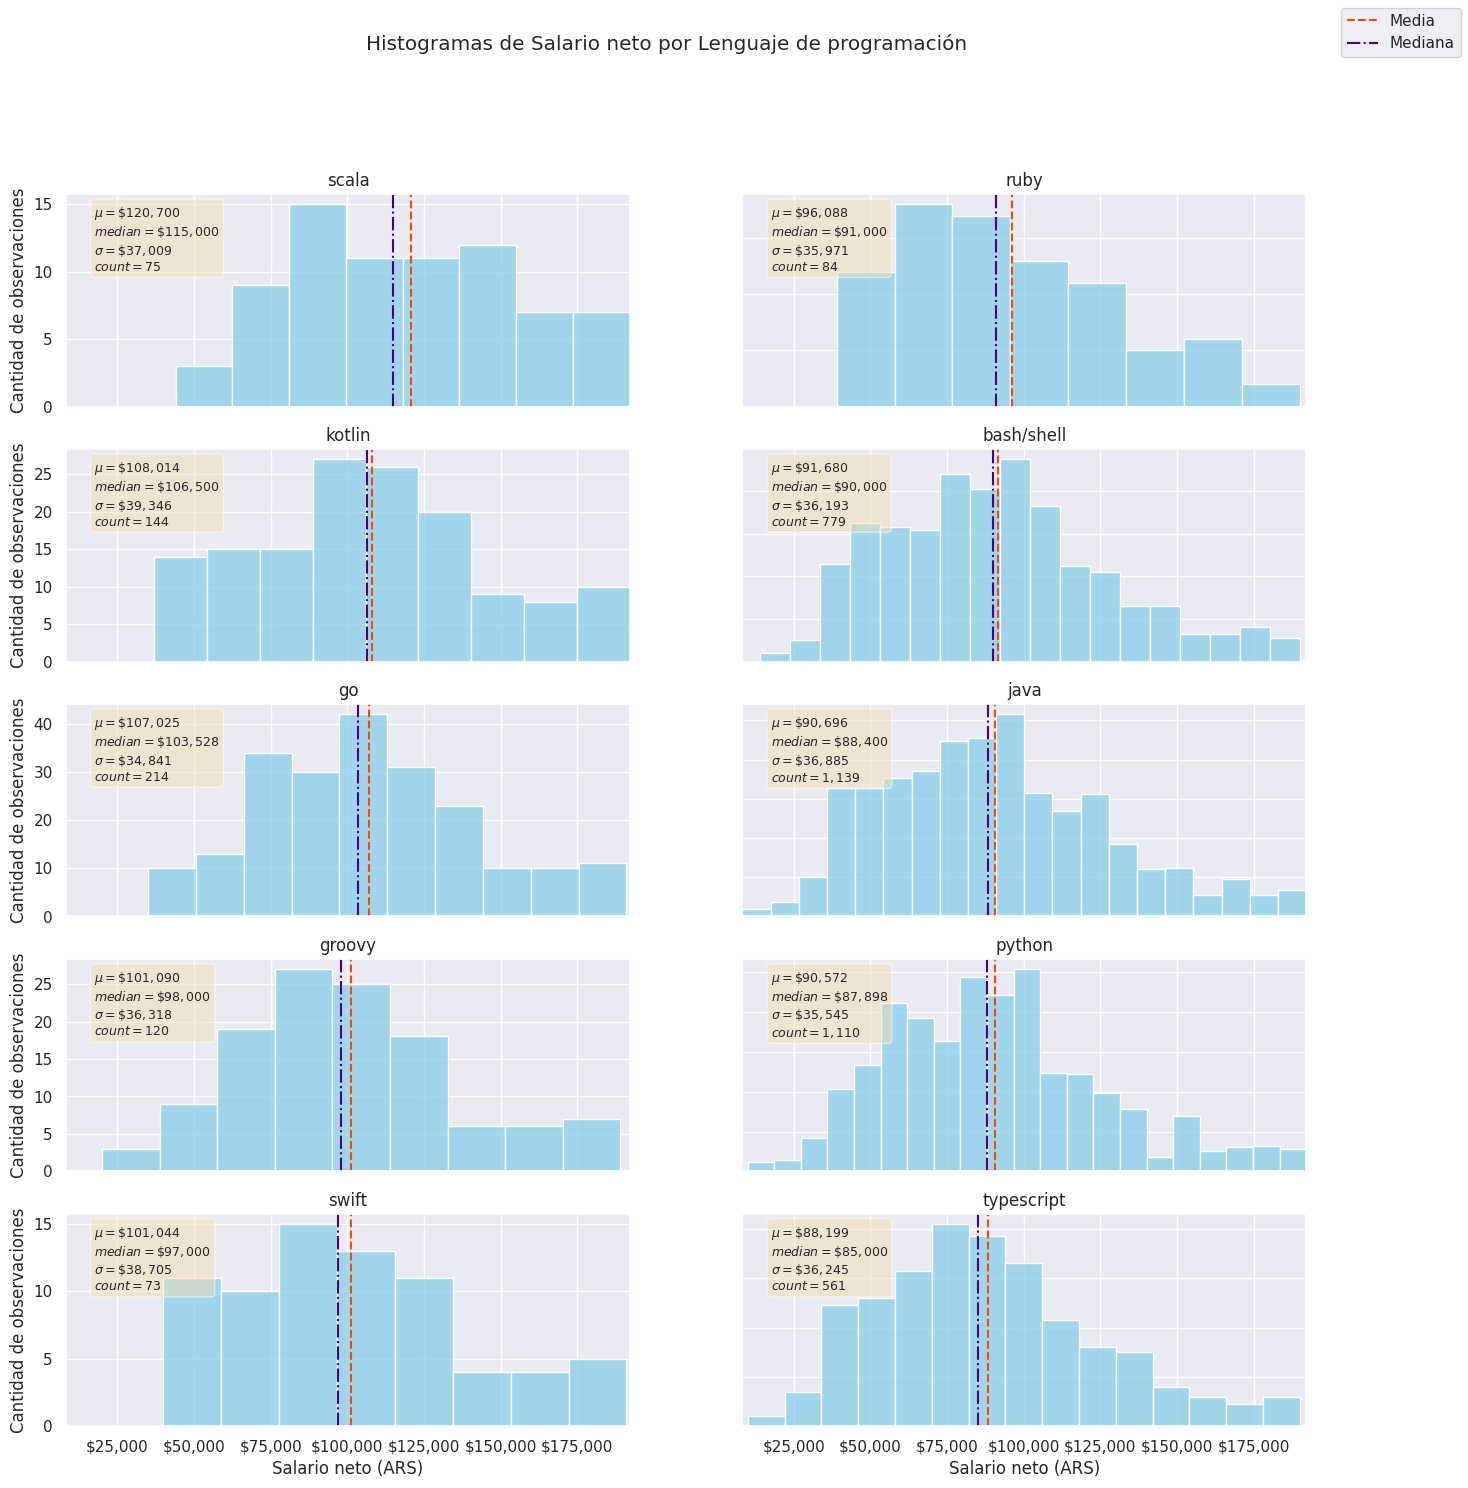

In [ ]:
plot_histogram_by_programming_language(clean_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


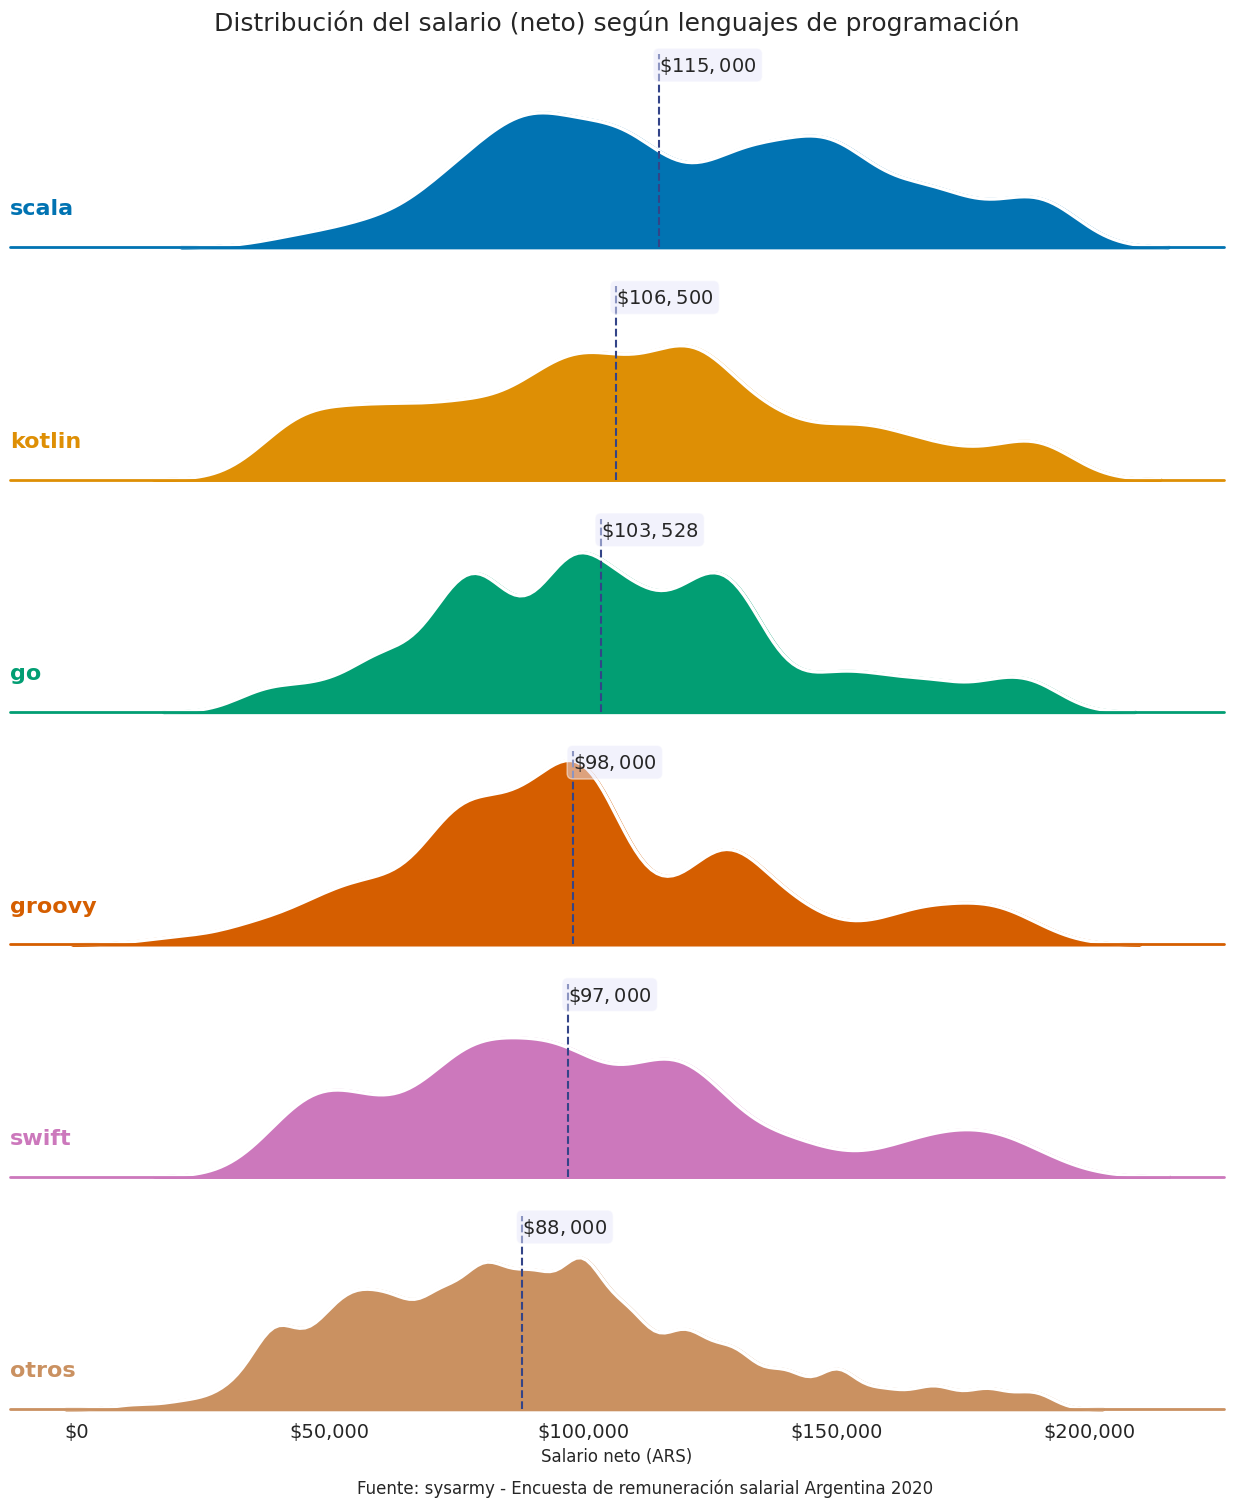

In [ ]:
plot_ridgeplot(clean_df)

Analizamos los estadígrafos de posición para cada lenguaje, inspeccionando el boxplot del dataset filtrado.

A partir de este gráfico, podemos observar con mayor claridad que los lenguajes _populares_ asociados a los mejores salarios son:
*  scala
*  kotlin
*  go
*  groovy
*  swift

Como dato de color, Python se encuentra también dentro del Top 10, con una mediana ligeramente por encima de la mediana general de todos los lenguajes.

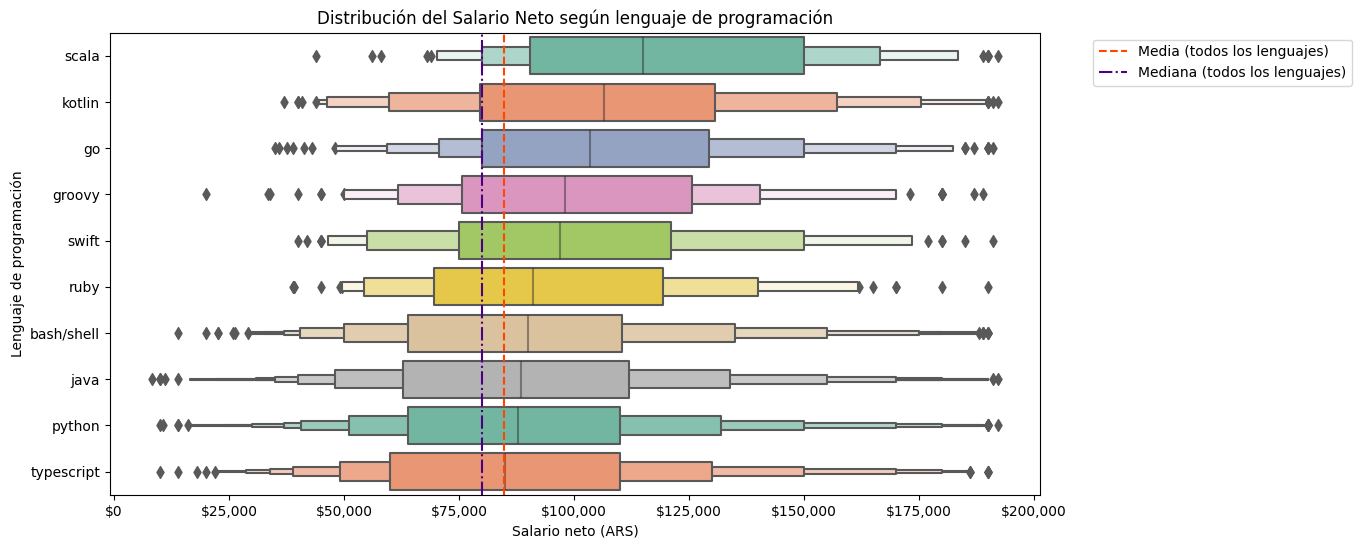

In [ ]:
plot_bloxpot(clean_df, clean_dataset_mean, clean_dataset_median)

A modo de contraste, el siguiente gráfico muestra la distribución de salarios para todos los lenguajes, sin excluir a los menos frecuentes/populares ni a los que tienen un salario medio más bajo.

Podemos observar que la mayoría de los lenguajes asociados a los salarios más altos se repiten en ambos gráficos (boxplots), salvo algunas excepciones (closure, objective-c, rust, etc.) que se corresponderían a lenguajes poco populares.

De hecho, tres de los lenguajes _populares_ siguen figurando dentro del TOP 5: **scala**, **kotlin**, **go**. Mientras que el resto (**groovy**, **swift**) queda desplazado al Top 10.

Si no tuviésemos en cuenta la popularidad de los lenguajes, la lista de los lenguajes de programación asociados a los salarios más altos serían:
* clojure
* scala
* objective-c
* kotlin
* go


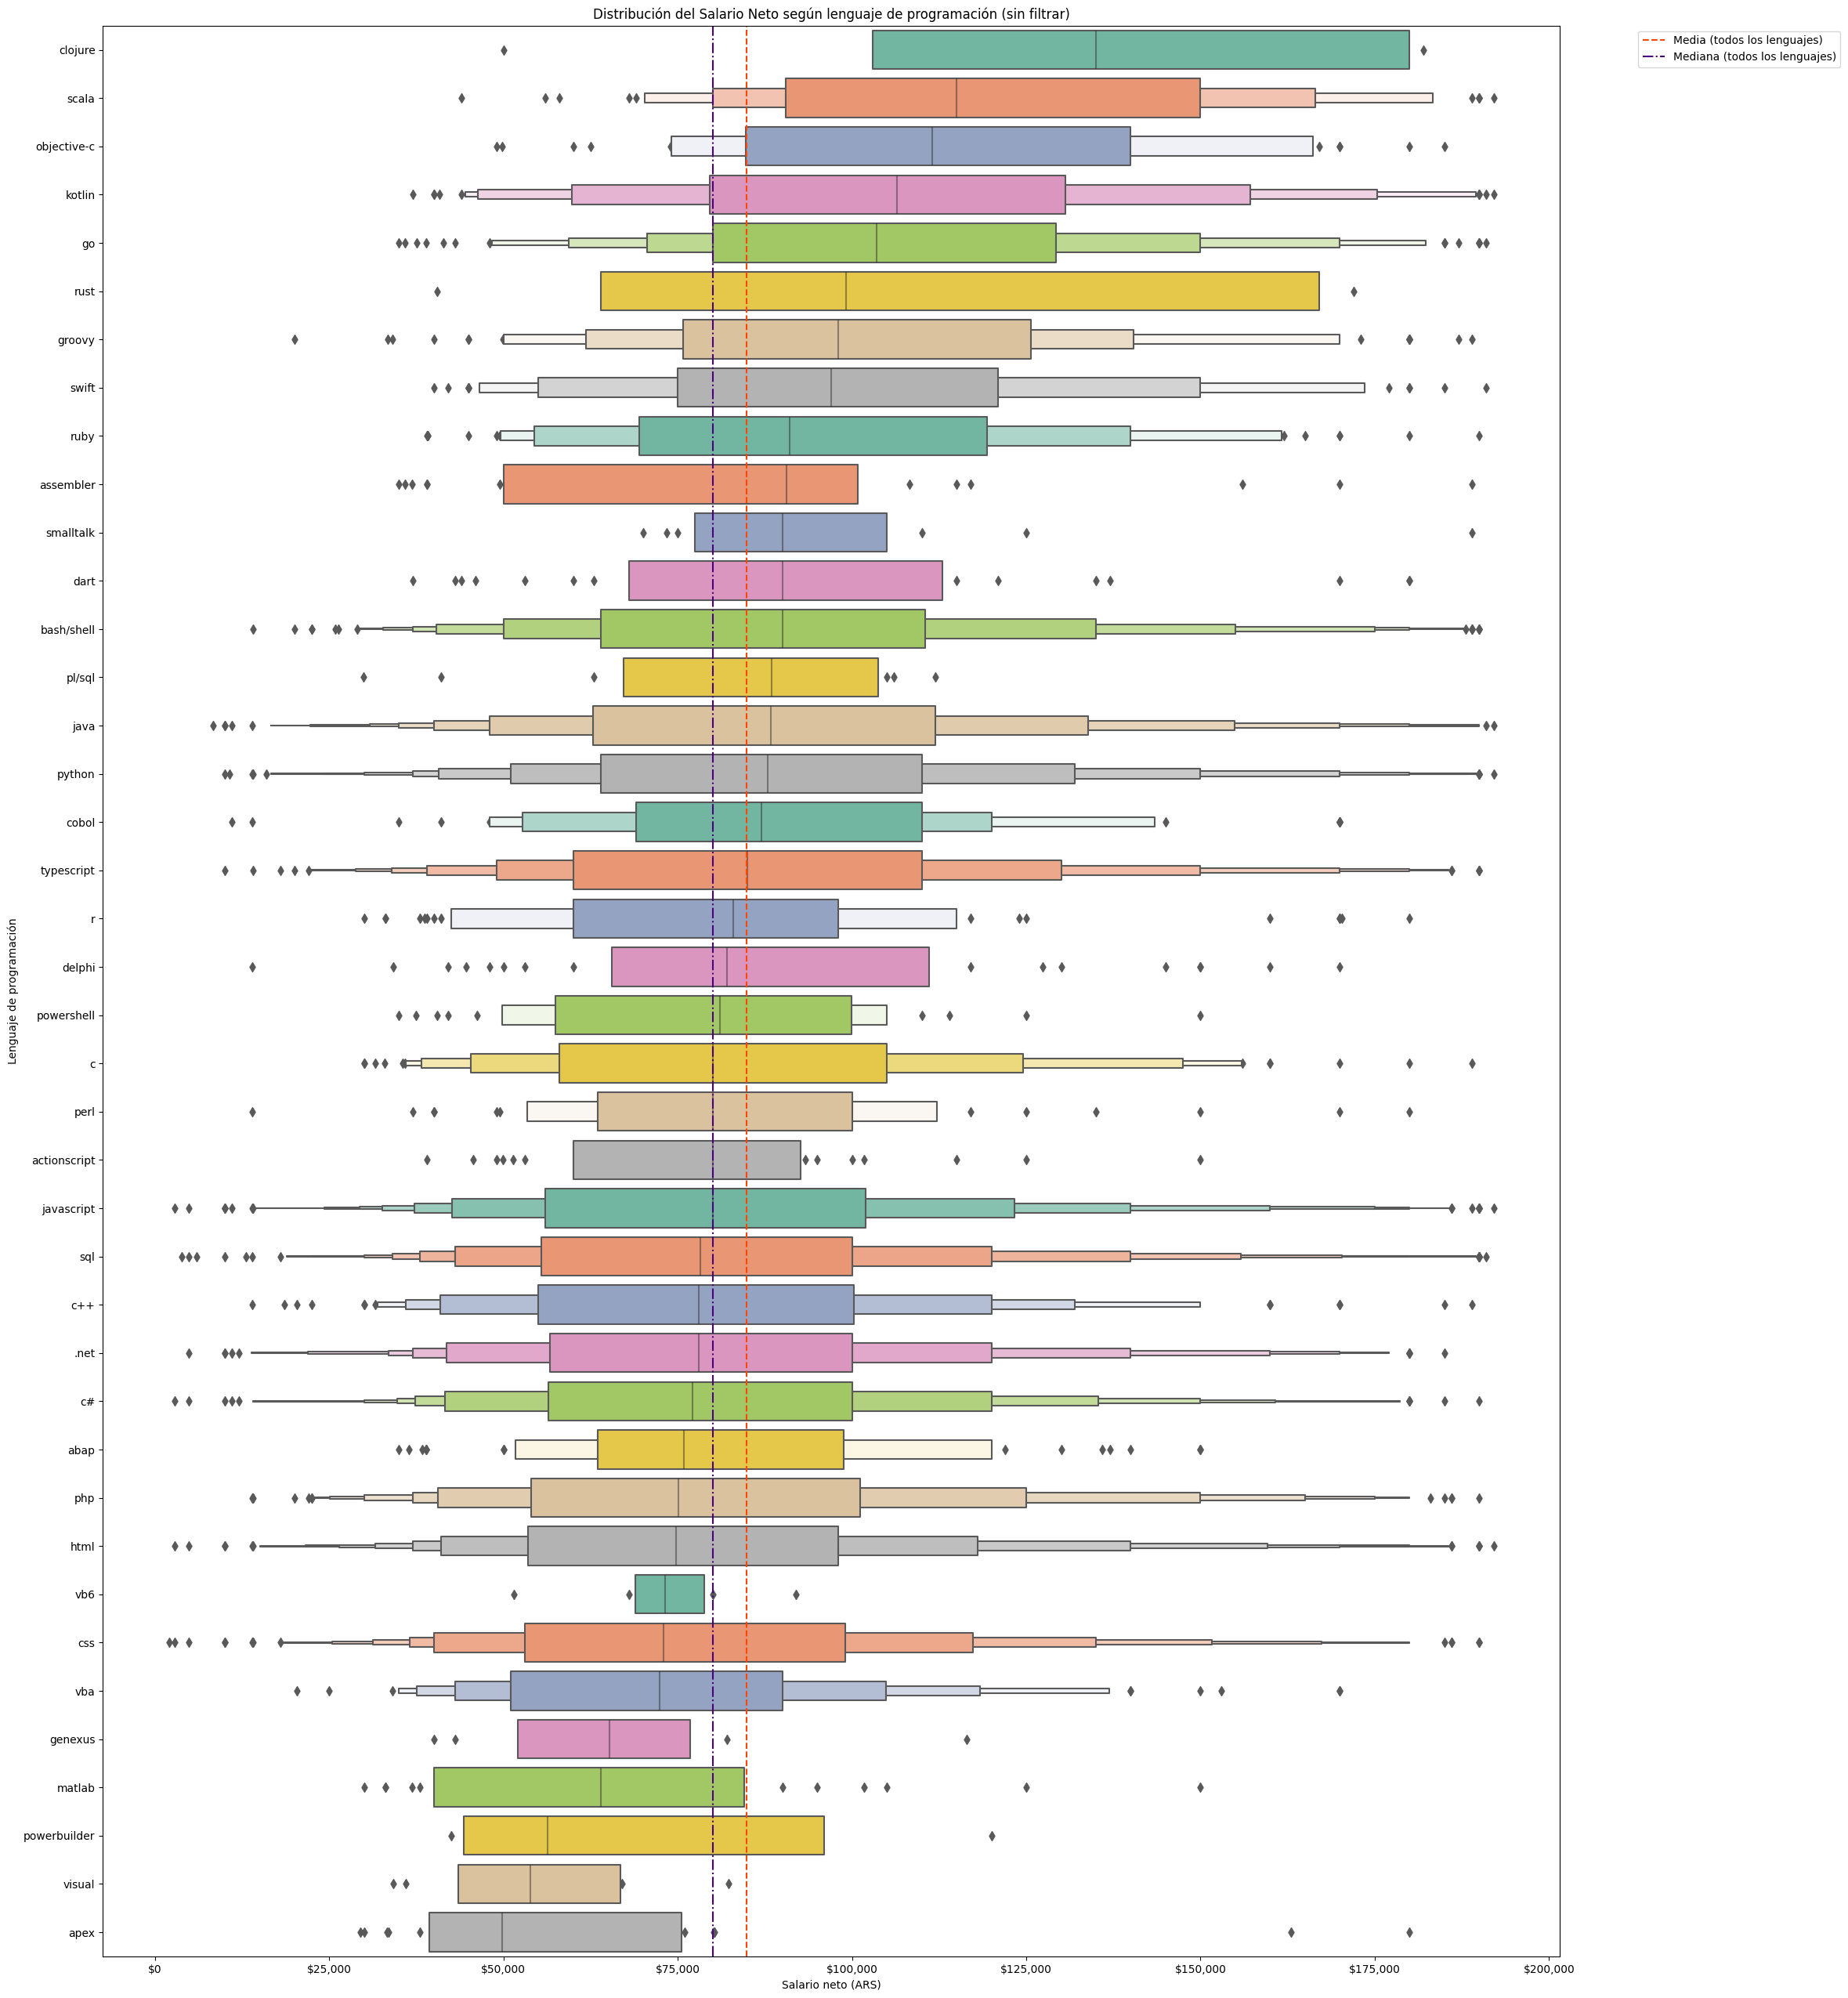

In [ ]:
plot_bloxpot(clean_df_lang, clean_dataset_mean, clean_dataset_median, 24, 32, 'Distribución del Salario Neto según lenguaje de programación (sin filtrar)')

Analizamos también la distribución de lenguajes por cuantiles del salario neto, y en particular dividimos en 4 cuantiles para hacer el análisis visual más ameno. Podemos observar lo siguiente:

- En el primer cuantil, asociado a los salarios más **bajos**, los lenguajes con **menor** proporción relativa corresponden a los **_LPPAMS_**. Esto quiere decir que para los **_LPPAMS_** hay relativamente **pocas** observaciones (5-20%) enmarcadas dentro de los salarios bajos en comparación con el resto de los lenguajes (20-30%).
- En el cuarto cuantil, asociado a los salarios más **altos**, los lenguajes con **mayor** proporción relativa también corresponden a los **_LPPAMS_**. Esto quiere decir que para estos lenguajes hay relativamente **muchas** observaciones (30-50%) enmarcadas dentro de los salarios más altos en comparación con el resto de los lenguajes (20-30%).
- En el caso del resto de los lenguajes del Top-10, se encuentran distribuidos más uniformemente a lo largo de los cuatro cuantiles.

Esto nos indica que los lenguajes del Top-5 son consistentemente más elevados que el resto de los lenguajes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


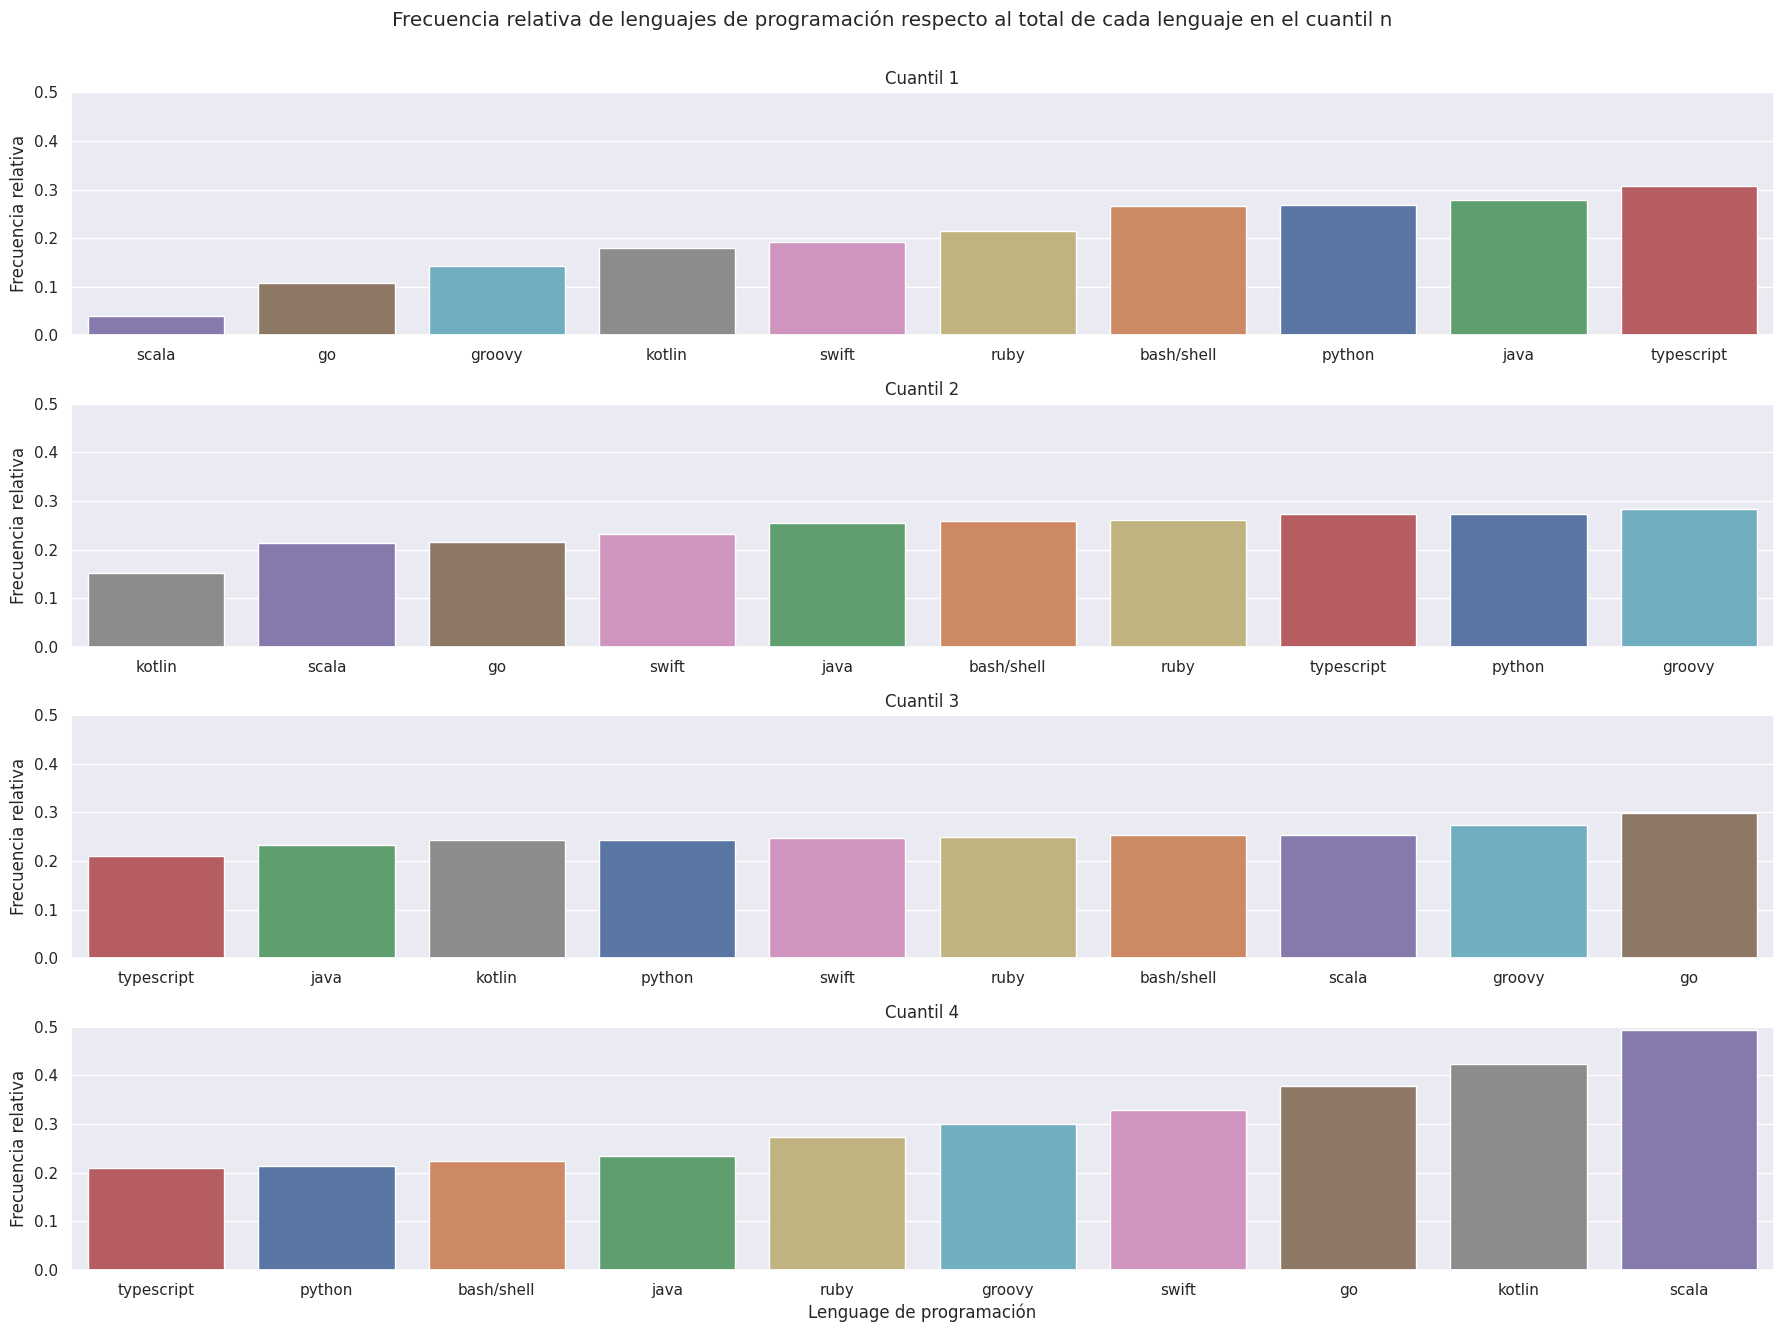

In [ ]:
add_quantiles_to_dataframe(clean_df, 4)
plot_programming_language_distribution_by_quantil(clean_df)
  

## Conclusiones

Se desprende de nuestro análisis que los lenguajes de programación _populares_ asociados a los mejores salarios serían los siguientes:
*  scala
*  kotlin
*  go
*  groovy
*  swift

El análisis de frecuencias relativas por cuantiles nos indica que estos lenguajes son consistentemente más elevados que el resto de los lenguajes.

Por otro lado, tomando en cuenta que las distribuciones y dispersiones son similares para todos los lenguajes analizados (top-10), sería difícil atribuir dicha tendencia (salarios consistentemente más altos) a algún caso extremo.

## Apéndice Ejercicio 1

Full-time: 0.8475799835931092
Non-Fulltime: 0.1524200164068909

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 103 to 6093
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tools_programming_languages  173 non-null    object 
 1   salary_monthly_NETO          173 non-null    float64
 2   work_contract_type           173 non-null    object 
 3   salary_in_usd                0 non-null      object 
 4   cured_programming_languages  173 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.1+ KB
None
       salary_monthly_NETO
count           173.000000
mean            453.547780
std            1524.240507
min               1.000000
25%              42.000000
50%              72.000000
75%             106.400000
max            8500.000000
Neto: 212 (3.4782608695652173%)
Bruto: 0 (0.0%)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55c80416d0>]],
      dtype=object)

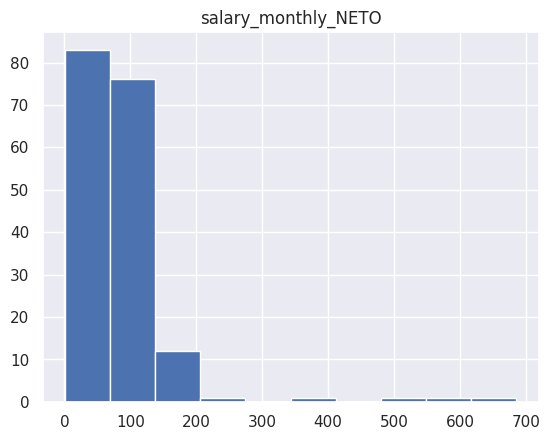

In [ ]:
non_fulltime = (df['work_contract_type'] != 'Full-Time').sum() # Son 929 no full-time, i.e. 15% >> a los propósitos del ejercicio, quizás se pueda dejar de lado.
fulltime = (df['work_contract_type'] == 'Full-Time').sum() # Son 5166 fulltime, i.e. 85%
print(f"Full-time: {fulltime/len(df)}\nNon-Fulltime: {non_fulltime/len(df)}\n")


# Salarjy in USD >> es un campo tipo texto, e indica si el salario está dolarizado, pero hay respuestas en USD y respuestas pesificadas
# Quizás remover casos donde salary_in_usd is not NA >> porque es irregular, en algunos casos tenemos valores expresados en USD y en otros el valor en ARS, o combinación
usd_mask = (df.salary_monthly_NETO < 10000) & (df.salary_monthly_NETO > 0) & (df.salary_in_usd.isna())
df_usd = df[usd_mask]
print(df_usd[relevant_columns].info())
print(df_usd[relevant_columns].describe())


# salary_monthly_NETO >> chequeamos el número de nulos, lo mismo para salary_monthly_BRUTO
neto_na = df.salary_monthly_NETO.isna().sum() # Son 212 o ~3.5% >> es insignificante, por lo que podemos descartarlos o de última calcularlos como el 83% de BRUTO (que para salarios registrados y bajos es representativo, para monotributistas y salarios por encima de ganancias quizás no)
bruto_na = df.salary_monthly_BRUTO.isna().sum() # No hay
print(f"Neto: {neto_na} ({neto_na/len(df)*100}%)\nBruto: {bruto_na} ({bruto_na/len(df)*100}%)")

# Separador de miles
df[df.salary_monthly_NETO < 1000][relevant_columns].hist() # From this histogram we may <<assume>> that perhaps the low number is due to numbers having a dot as thousand separator.
# We can either remove these records or multiply them by 1,000. For the moment we will remove these points in order to limit how much bias we introduce into the analysis.


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [ ]:
columns_for_outlier_removal = [ 'profile_age', 'profile_years_experience', 'salary_monthly_NETO', 'salary_monthly_BRUTO']
df_2 = filtrado_de_datos(df, columns_for_outlier_removal)

Cantidad de observaciones filtradas: 4529



## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




***Variables:***
- Numéricas: 'profile_age', 'profile_years_experience', 'salary_monthly_NETO'
- Categóricas: 'work_province', 'profile_gender' 

In [ ]:
relevant_columns = [ 'profile_age', 'profile_years_experience', 'salary_monthly_NETO', 'work_province', 'profile_gender', 'profile_studies_level','salary_monthly_BRUTO']

In [ ]:
df2 = df_2[relevant_columns]

***VARIABLES CATEGÓRICAS***

Para el abordaje de las variables categóricas podemos utilizar tablas de contingencia, así como también algunas herramientas gráficas (ver más abajo).

In [ ]:
## Tabla de contingencia
pd.crosstab(df2.profile_gender, df2.work_province)#, normalize=True) #no están ordenados 

work_province,Catamarca,Chaco,Chubut,Ciudad Autónoma de Buenos Aires,Corrientes,Córdoba,Entre Ríos,Formosa,GBA,Jujuy,...,Provincia de Buenos Aires,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán
profile_gender,,,,,,,,,,,,,,,,,,,,,
Hombre,1,19,17,2351,9,281,36,3,325,20,...,298,28,6,3,9,3,235,3,10,16
Mujer,0,0,0,528,2,40,1,0,33,0,...,40,4,0,1,1,1,36,0,1,1
Otros,0,1,0,15,0,1,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


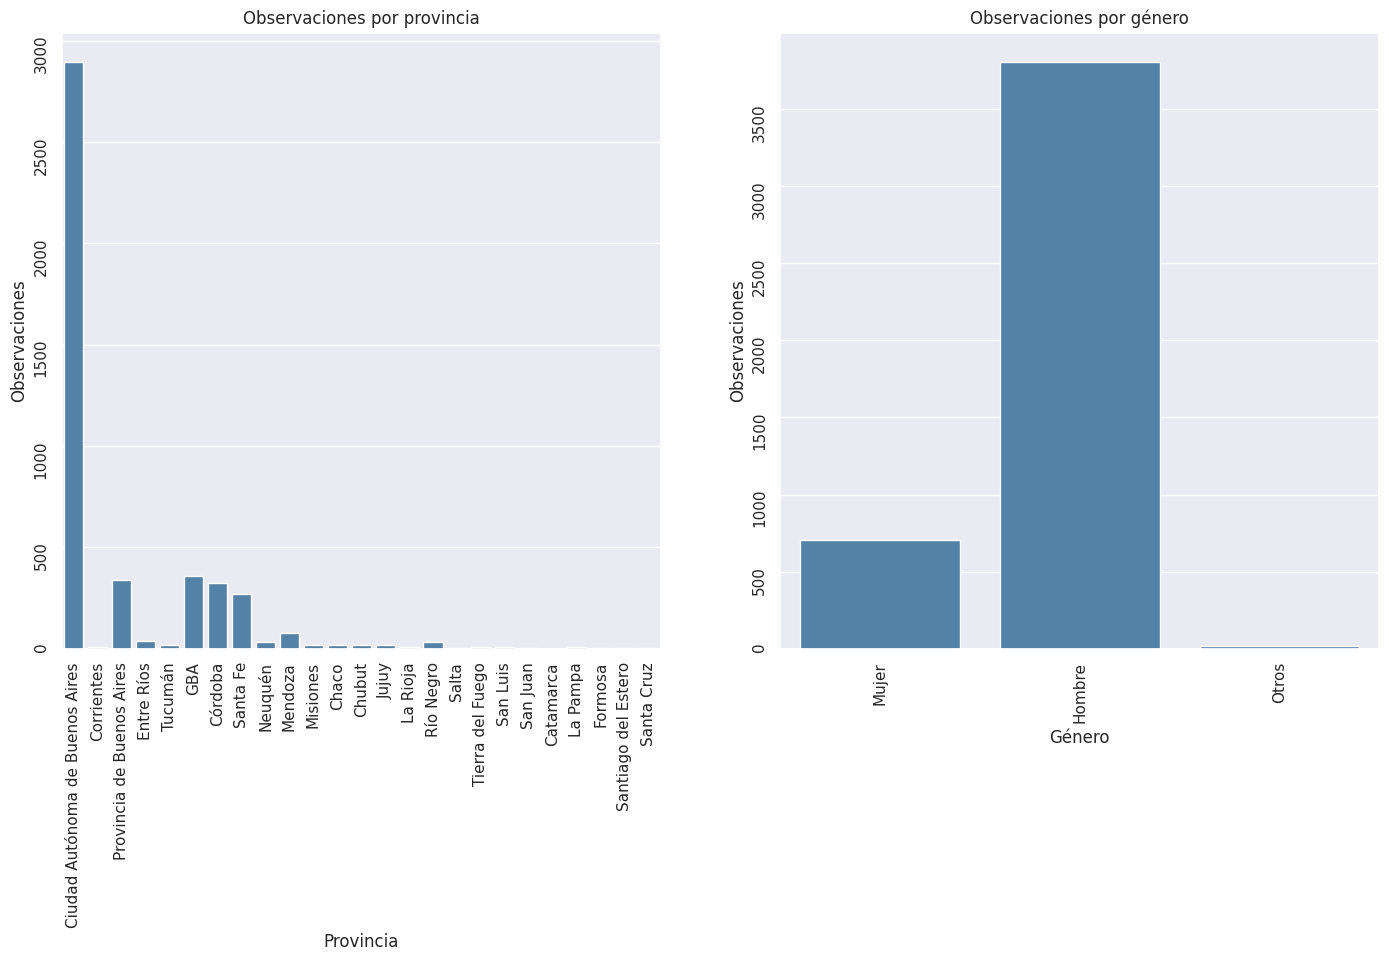

In [ ]:
# Categóricas
fig, axes = plt.subplots(ncols=2, figsize=(17,8))
g = seaborn.countplot(
    df2.work_province, color='steelblue', ax=axes[0]) # double check or change
axes[0].set(
        xlabel='Provincia',
        ylabel='Observaciones',
        title='Observaciones por provincia')

g = seaborn.countplot(df2.profile_gender, color='steelblue', ax=axes[1])
axes[1].set(
        xlabel='Género',
        ylabel='Observaciones',
        title='Observaciones por género')

for ax in axes:
  ax.tick_params(labelrotation=90)

Filtro que permite obtener el Top 5 de provincias:

In [ ]:
top_5 = df2[df2["work_province"].isin(['Ciudad Autónoma de Buenos Aires', 'Provincia de Buenos Aires','GBA','Córdoba','Santa Fe'])]
top_5.head()

,profile_age,profile_years_experience,salary_monthly_NETO,work_province,profile_gender,profile_studies_level,salary_monthly_BRUTO
0,26,3.0,43000.0,Ciudad Autónoma de Buenos Aires,Mujer,Universitario,53000.0
2,22,2.0,127000.0,Ciudad Autónoma de Buenos Aires,Mujer,Secundario,160000.0
4,32,9.0,106000.0,Ciudad Autónoma de Buenos Aires,Hombre,Universitario,140000.0
5,25,1.0,44000.0,Ciudad Autónoma de Buenos Aires,Hombre,Terciario,54000.0
6,33,1.0,62400.0,Ciudad Autónoma de Buenos Aires,Hombre,Universitario,75000.0


In [ ]:
sorted_work_province = ['Ciudad Autónoma de Buenos Aires', 'Córdoba', 'GBA', 'Provincia de Buenos Aires',
                         'Santa Fe']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

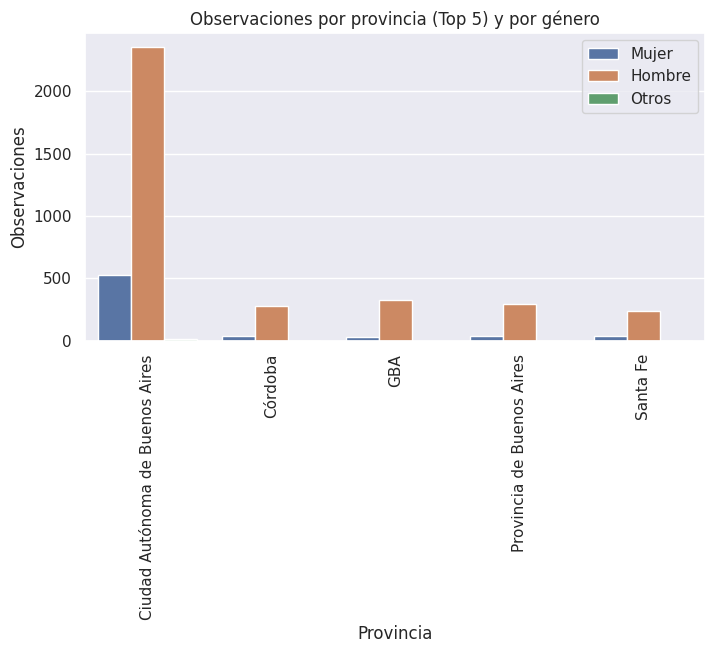

In [ ]:
##Categóricas, gráfico que combina ambas variables seleccionadas considerando el Top 5 de provincias
fig = plt.figure(figsize=(8,4))
seaborn.countplot(
    top_5.work_province,  
    hue=df.profile_gender,
    order=sorted_work_province
    ).set(
        xlabel='Provincia',
        ylabel='Observaciones',
        title='Observaciones por provincia (Top 5) y por género')
    
plt.legend(loc='upper right')
plt.xticks(rotation=90)

Tanto la tabla de contingencia como el gráfico nos permiten decir que la mayoría de las personas que respondieron la encuesta son hombres que trabajan/residen en CABA.

***VARIABLES NUMÉRICAS***

Para estas variables podemos utilizar distintas herramientas gráficas que nos permitan visualizar como se distribuyen y si hay posibles relaciones entre ellas.

[Text(0, -25000.0, '$-25,000'),
 Text(0, 0.0, '$0'),
 Text(0, 25000.0, '$25,000'),
 Text(0, 50000.0, '$50,000'),
 Text(0, 75000.0, '$75,000'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 125000.0, '$125,000'),
 Text(0, 150000.0, '$150,000'),
 Text(0, 175000.0, '$175,000'),
 Text(0, 200000.0, '$200,000')]

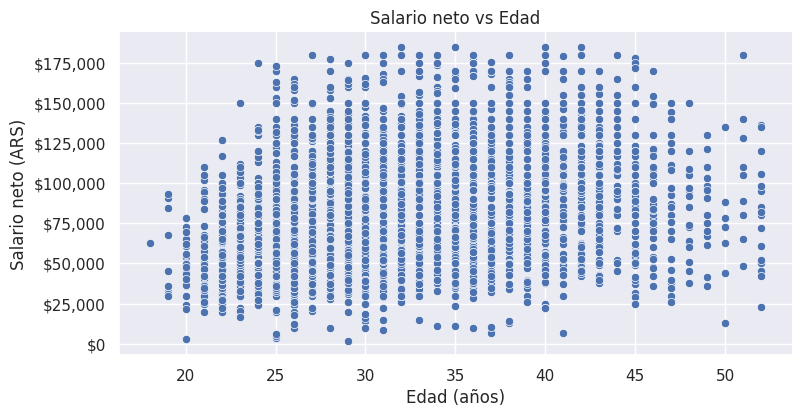

In [ ]:
seaborn.pairplot(
    data=df2, 
    x_vars=['profile_age'],
    y_vars=['salary_monthly_NETO'],
    aspect=2,
    height=4).set(
        ylabel='Salario neto (ARS)',
        xlabel='Edad (años)',
        title='Salario neto vs Edad')

# Formateamos los valores del eje-y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(y) for y in current_values])

El gráfico anterior entre las variables edad y salario nos permite ver que no hay una relación clara entre ambas. Los sueldos de las personas aparentemente no dependen de la edad de las mismas. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,
No handles with labels found to put in legend.


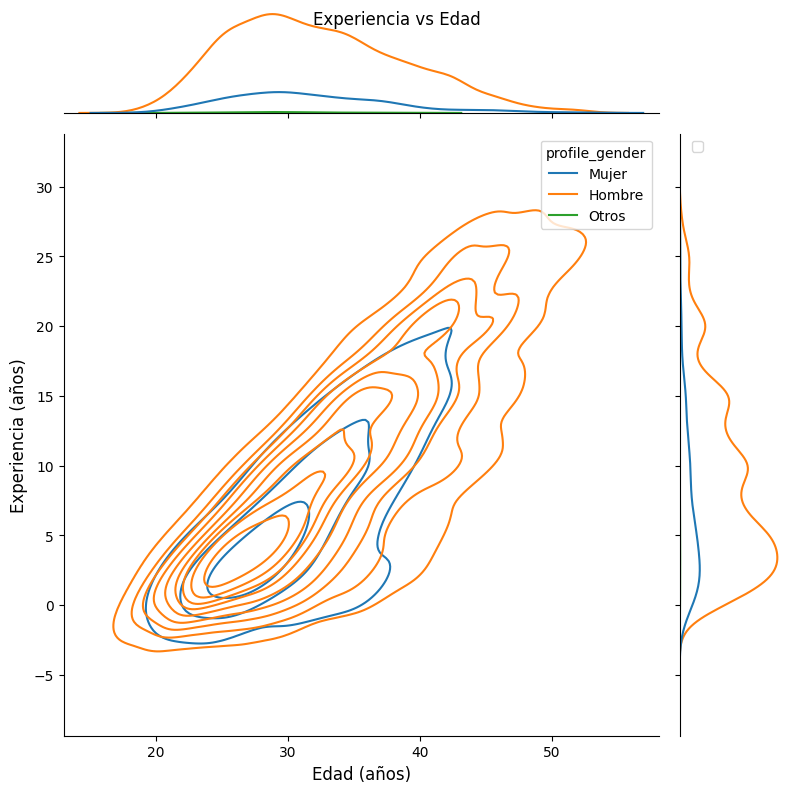

In [ ]:
max_age=99
matplotlib.rc_file_defaults()
h= seaborn.jointplot(data=df2[df2.profile_age < max_age],
                  x='profile_age',
                  y='profile_years_experience', 
                  hue='profile_gender',
                  kind='kde', height=8)

h.set_axis_labels('Edad (años)', 'Experiencia (años)', fontsize=12)

h.fig.suptitle("Experiencia vs Edad")

plt.legend(bbox_to_anchor=(0.05, 1.0), loc='upper left')

En el gráfico anterior podemos observar que existe una relación (esperada) entre las variables edad y los años de experiencia de la persona; a mayor edad más años de experiencia. También podemos ver que hay un mayor número de hombres en el conjunto de datos. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[Text(0, -25000.0, '$-25,000'),
 Text(0, 0.0, '$0'),
 Text(0, 25000.0, '$25,000'),
 Text(0, 50000.0, '$50,000'),
 Text(0, 75000.0, '$75,000'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 125000.0, '$125,000'),
 Text(0, 150000.0, '$150,000'),
 Text(0, 175000.0, '$175,000'),
 Text(0, 200000.0, '$200,000')]

<Figure size 800x400 with 0 Axes>

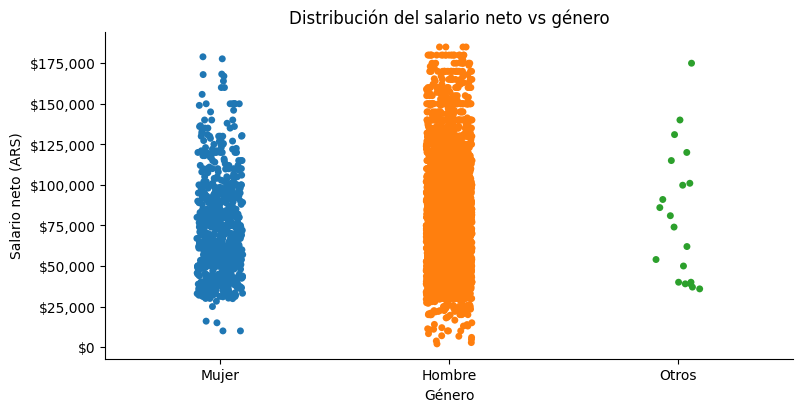

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.catplot(data=df2[df.profile_age < max_age],
                y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='profile_gender', 
                height=4,
                aspect=2).set(
                    ylabel='Salario neto (ARS)',
                    xlabel='Género',
                    title='Distribución del salario neto vs género'
                )

# Formateamos los valores del eje-y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(y) for y in current_values])

En el gráfico anterior que combina una variable categórica con una numérica, podemos observar que hay un mayor número de hombres entre los encuestados (al igual que pudimos observar en gráficos anteriores) y estos poseen valores más altos de salario. Si bien las mujeres y otros géneros estan menos representados, sus salarios están bastante distribuidos.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



***Visual:***
- Se puede hacer un gráfico estilo scatter dado que ambas son variables numéricas

[Text(0, 0, '$-25,000'),
 Text(0, 0, '$0'),
 Text(0, 0, '$25,000'),
 Text(0, 0, '$50,000'),
 Text(0, 0, '$75,000'),
 Text(0, 0, '$100,000'),
 Text(0, 0, '$125,000'),
 Text(0, 0, '$150,000'),
 Text(0, 0, '$175,000'),
 Text(0, 0, '$200,000')]

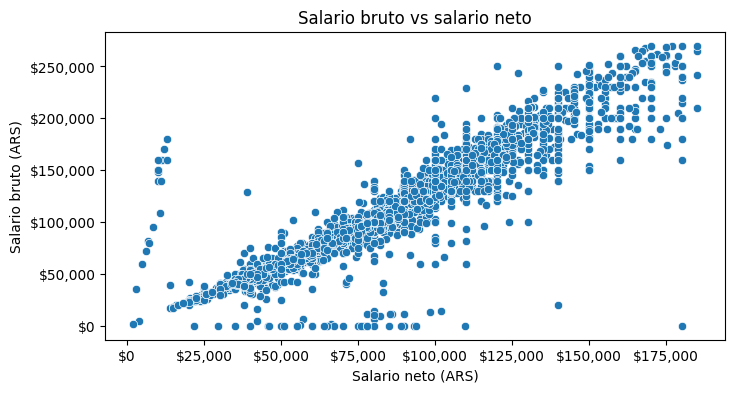

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.scatterplot(data=df2, 
                    x="salary_monthly_NETO",
                    y="salary_monthly_BRUTO").set(
                        ylabel='Salario bruto (ARS)',
                        xlabel='Salario neto (ARS)',
                        title='Salario bruto vs salario neto'
                    )
# Formateamos los valores del eje-y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(y) for y in current_values])

# Formateamos los valores del eje-x
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

***Cuantitativo:***
- Se puede invocar el método .corr() de pandas

In [ ]:
df2[['salary_monthly_BRUTO','salary_monthly_NETO']].corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.00000,0.93776
salary_monthly_NETO,0.93776,1.00000


El valor de correlación muy cercano a 1 indica una correlación positiva casi perfecta. Por lo cual la columna del salario bruto la podemos extraer y quedarnos solamente con la columna del salario neto.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Tabla de contingencia para elegir las dos dubpoblaciones más numerosas:

In [ ]:
group_col= 'profile_studies_level'
df2[[group_col, 'salary_monthly_NETO']]. groupby(group_col). describe()

salary_monthly_NETO                              \
                                    count          mean           std   
profile_studies_level                                                   
Doctorado                            16.0  77682.191875  30711.012256   
Posdoctorado                          2.0  98500.000000  16263.455967   
Posgrado                            221.0  99769.080814  32341.872600   
Primario                              2.0  87500.000000  45961.940777   
Secundario                          345.0  71720.923710  32923.960811   
Terciario                           875.0  74566.442354  32239.221935   
Universitario                      3068.0  82398.553517  32838.006728   

                                                                      
                           min      25%      50%       75%       max  
profile_studies_level                                                 
Doctorado              10700.0  53375.0  88950.0   96250.0  132000.0  
Posdoctorado           87000.0  92750.0  98500.0  104250.0  110000.0  
Posgrado               11000.0  78000.0  98000.0  120000.0  180000.0  
Primario               55000.0  71250.0  87500.0  103750.0  120000.0  
Secundario              2000.0  45000.0  66000.0   91300.0  180000.0  
Terciario               7000.0  50000.0  70000.0   92575.0  185000.0  
Universitario           2800.0  57000.0  80000.0  102000.0  185000.0

Las dos subpoblaciones más numerosas son Terciario y Universitario. Realizamos los histogramas:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[Text(0, 0, '$-25,000'),
 Text(0, 0, '$0'),
 Text(0, 0, '$25,000'),
 Text(0, 0, '$50,000'),
 Text(0, 0, '$75,000'),
 Text(0, 0, '$100,000'),
 Text(0, 0, '$125,000'),
 Text(0, 0, '$150,000'),
 Text(0, 0, '$175,000'),
 Text(0, 0, '$200,000')]

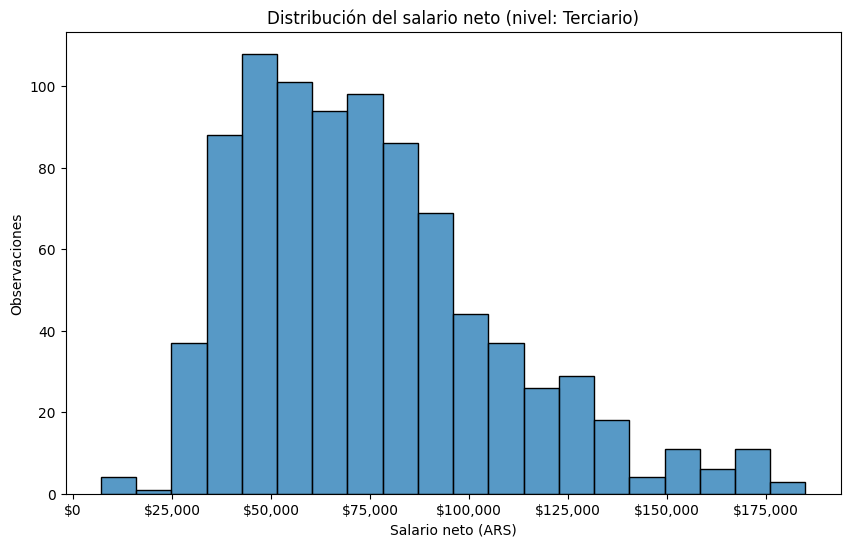

In [ ]:
fig = plt.figure(figsize=(10,6))
seaborn.histplot(df2[df.profile_studies_level == 'Terciario'].salary_monthly_NETO ).set(
                        ylabel='Observaciones',
                        xlabel='Salario neto (ARS)',
                        title='Distribución del salario neto (nivel: Terciario)'
                    )

# Formateamos los valores del eje-x
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[Text(0, 0, '$-25,000'),
 Text(0, 0, '$0'),
 Text(0, 0, '$25,000'),
 Text(0, 0, '$50,000'),
 Text(0, 0, '$75,000'),
 Text(0, 0, '$100,000'),
 Text(0, 0, '$125,000'),
 Text(0, 0, '$150,000'),
 Text(0, 0, '$175,000'),
 Text(0, 0, '$200,000')]

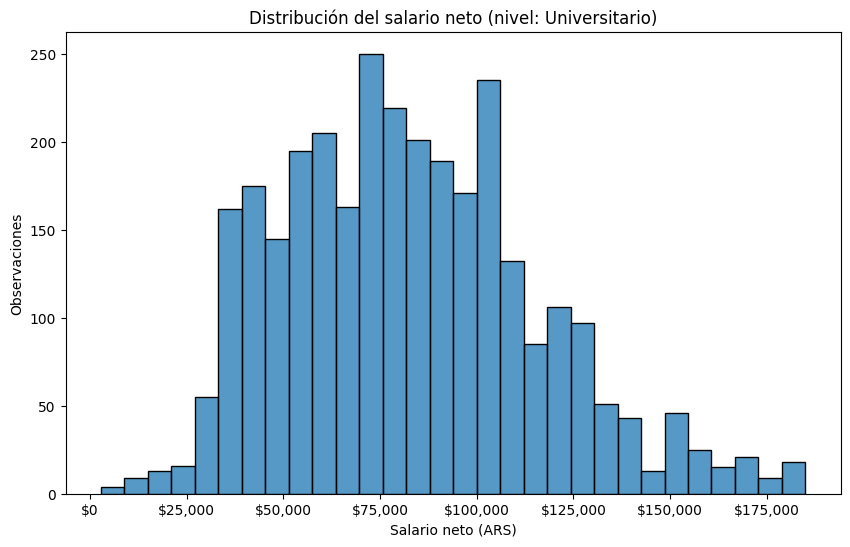

In [ ]:
fig = plt.figure(figsize=(10,6))
seaborn.histplot(df2[df.profile_studies_level == 'Universitario'].salary_monthly_NETO ).set(
                        ylabel='Observaciones',
                        xlabel='Salario neto (ARS)',
                        title='Distribución del salario neto (nivel: Universitario)'
                    )

# Formateamos los valores del eje-x
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

Cálculo de Media y Mediana para la subpoblación Terciario:

In [ ]:
nivel = 'Terciario'
print(
    f"Media (nivel: {nivel}): {df2[df.profile_studies_level == nivel].salary_monthly_NETO.mean()}\n Mediana (nivel: {nivel}): {df2[df.profile_studies_level == nivel].salary_monthly_NETO.median()}\n"
)

Media (nivel: Terciario): 74566.44235428571
 Mediana (nivel: Terciario): 70000.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Cálculo de Media y Mediana para la subpoblación Universitario:


In [ ]:
nivel = 'Universitario'
print(
    f"Media (nivel: {nivel}): {(df2[df.profile_studies_level == nivel].salary_monthly_NETO).mean()}\n Mediana (nivel: {nivel}): {(df2[df.profile_studies_level == nivel].salary_monthly_NETO).median()}\n"
)

Media (nivel: Universitario): 82398.55351694916
 Mediana (nivel: Universitario): 80000.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Cálculo de Coeficiente de variación para la subpoblación Terciario:

In [ ]:
import scipy

nivel = 'Terciario'

print(f"Coeficiente de variación salario neto {nivel}: {scipy.stats.variation(df2[df.profile_studies_level == nivel].salary_monthly_NETO.dropna())}\n")

Coeficiente de variación salario neto Terciario: 0.43210850938304



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Cálculo de Coeficiente de variación para la subpoblación Universitario:

In [ ]:
#import scipy

nivel = 'Universitario'

print(f"Coeficiente de variación salario neto {nivel}: {scipy.stats.variation(df2[df.profile_studies_level == nivel].salary_monthly_NETO.dropna())}\n")

Coeficiente de variación salario neto Universitario: 0.3984615408272636



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Para ver si ambas variables son independientes podemos graficar ambos histogramas de manera conjunta:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated func

Text(0.5, 0, 'Salario neto (ARS)')

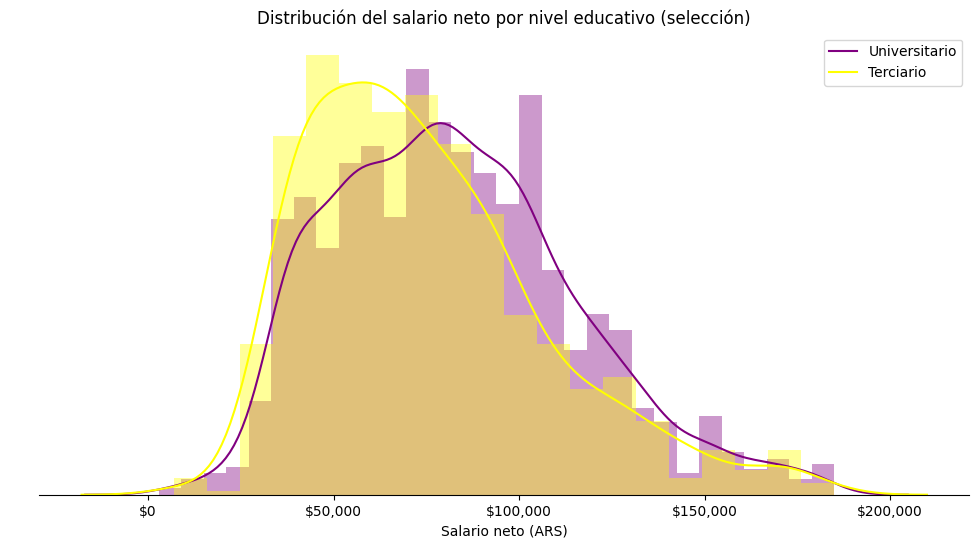

In [ ]:
fig = plt.figure(figsize=(12,6))

df2_selected = df2[df.profile_studies_level.isin(['Universitario', 'Terciario'])]

seaborn.distplot(df2[df.profile_studies_level == 'Universitario'].salary_monthly_NETO, color="purple").set(
                        ylabel=' ',
                        xlabel='Salario neto (ARS)',
                        title='Distribución del salario neto por nivel educativo (selección)',
                        yticklabels=[]
                    )

seaborn.distplot(df2[df.profile_studies_level == 'Terciario'].salary_monthly_NETO, color="yellow" ).set(
                        ylabel=' ',
                        xlabel='Salario neto (ARS)',
                        title='Distribución del salario neto por nivel educativo (selección)',
                        yticklabels=[]
                    )

plt.legend(labels=['Universitario', 'Terciario'])

#seaborn.displot(data=df2_selected, x="salary_monthly_NETO", hue="profile_studies_level", color=['purple', 'yellow'], kde=True)


# Formateamos los valores del eje-x
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

seaborn.despine(top=True, left=True, right=True)
plt.tick_params(left=False)
plt.xlabel('Salario neto (ARS)')

El gráfico nos permite ver que existe una gran superposición entre los salarios de ambas subpoblaciones (Terciario y Universitario) los que indicaría que ambas variables son independientes.

También podemos realizar un gráfico con el salario en función de todos los niveles de la variable nivel de estudios (Primario y Postdoctorado fueron removidos ya que había solo un par de puntos de cada tipo). 

In [ ]:
studies_level = df2[df2["profile_studies_level"].isin(['Universitario', 'Secundario','Posgrado','Terciario','Doctorado'])]
studies_level.head()

,profile_age,profile_years_experience,salary_monthly_NETO,work_province,profile_gender,profile_studies_level,salary_monthly_BRUTO
0,26,3.0,43000.0,Ciudad Autónoma de Buenos Aires,Mujer,Universitario,53000.0
1,29,5.0,63000.0,Corrientes,Hombre,Universitario,79000.0
2,22,2.0,127000.0,Ciudad Autónoma de Buenos Aires,Mujer,Secundario,160000.0
3,39,15.0,102000.0,Corrientes,Hombre,Posgrado,130000.0
4,32,9.0,106000.0,Ciudad Autónoma de Buenos Aires,Hombre,Universitario,140000.0


In [ ]:
sorted_work_studies= ['Doctorado', 'Posgrado', 'Universitario', 'Terciario', 'Secundario']

[Text(0, -25000.0, '$-25,000'),
 Text(0, 0.0, '$0'),
 Text(0, 25000.0, '$25,000'),
 Text(0, 50000.0, '$50,000'),
 Text(0, 75000.0, '$75,000'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 125000.0, '$125,000'),
 Text(0, 150000.0, '$150,000'),
 Text(0, 175000.0, '$175,000'),
 Text(0, 200000.0, '$200,000')]

<Figure size 1200x600 with 0 Axes>

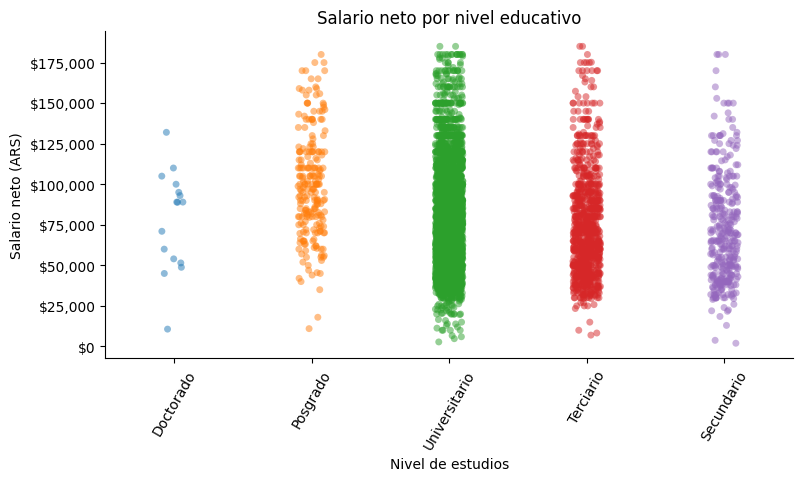

In [ ]:
fig = plt.figure(figsize=(12,6))

seaborn.catplot(data=studies_level, y='salary_monthly_NETO',
                x='profile_studies_level', 
                height=4, aspect=2, order=sorted_work_studies, alpha=0.5
                ).set(
                        ylabel='Salario neto (ARS)',
                        xlabel='Nivel de estudios',
                        title='Salario neto por nivel educativo'
                    )
plt.xticks(rotation=60)

# Formateamos los valores del eje-y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(y) for y in current_values])

El gráfico no muestra ningún tipo de patrón en particular, por lo cual podemos sugerir que ambas variables son independientes (Nivel de estudios y Salario). 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


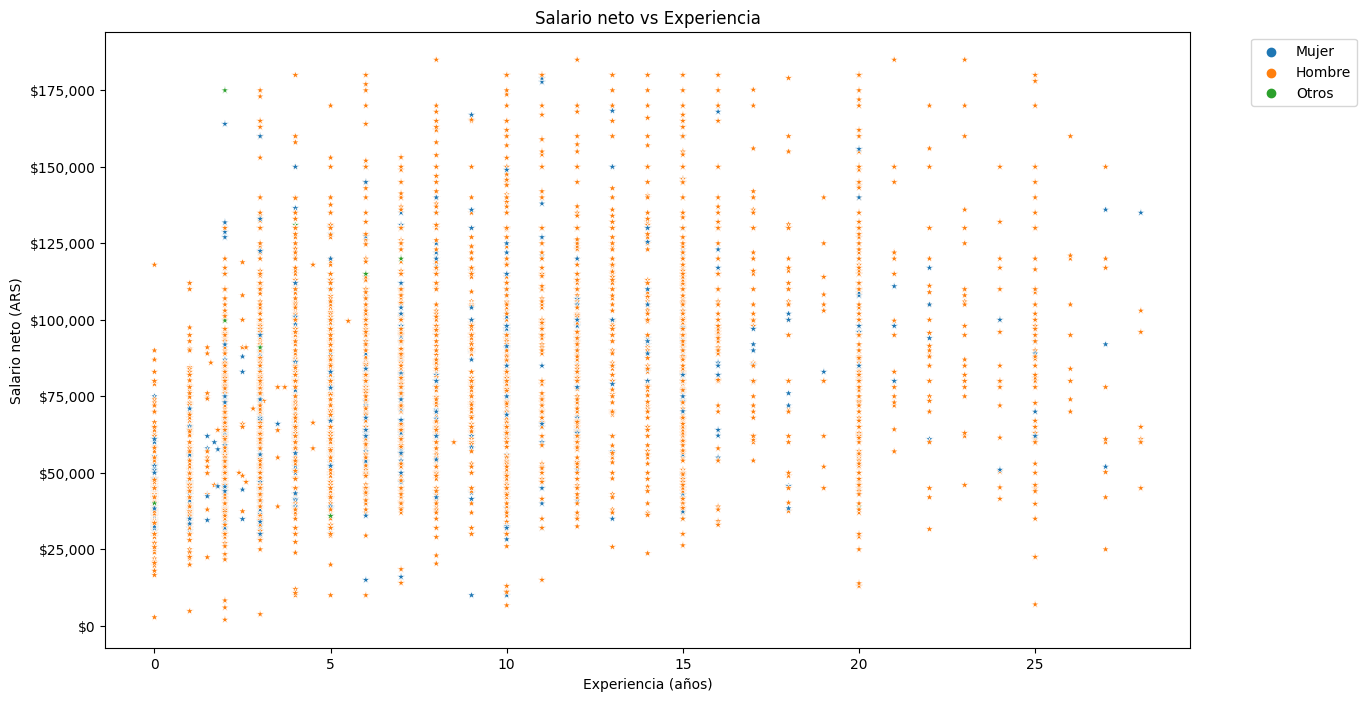

In [ ]:
fig = plt.figure(figsize=(14,8))
#import seaborn as sns
seaborn.scatterplot(data=df_2,
                y="salary_monthly_NETO", 
                x="profile_years_experience", 
                hue="profile_gender", 
                marker="*").set(
                        ylabel='Salario neto (ARS)',
                        xlabel='Experiencia (años)',
                        title='Salario neto vs Experiencia'
                    )
                
# Formateamos los valores del eje-y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(y) for y in current_values])

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

En el gráfico anterior podemos observar que los datos están bastante dispersos y que no hay un patrón claro entre los años de experiencia y el salario. Si se observa que hay muchos más datos de hombres, que de mujeres y otros géneros.